In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import tensorflow as tf

plt.style.use('fivethirtyeight')
%matplotlib inline

In [9]:
sea_stock_data = pd.read_csv('SE.csv', parse_dates=['Date'], index_col='Date').dropna()
tencent_stock_data = pd.read_csv('TCEHY.csv', parse_dates=['Date'], index_col='Date').dropna()
alibaba_stock_data = pd.read_csv('BABA.csv', parse_dates=['Date'], index_col='Date').dropna()
sp_stock_data = pd.read_csv("^GSPC.csv", parse_dates=['Date'], index_col='Date').dropna()

print(sea_stock_data.head())

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2019-10-17  28.520000  28.780001  27.750000  27.830000  27.830000  2370200
2019-10-18  27.559999  27.730000  26.719999  26.980000  26.980000  4361800
2019-10-21  26.980000  27.430000  26.410000  27.230000  27.230000  4058300
2019-10-22  27.230000  27.930000  26.660000  26.700001  26.700001  3681800
2019-10-23  26.770000  27.650000  26.650000  27.260000  27.260000  3985000


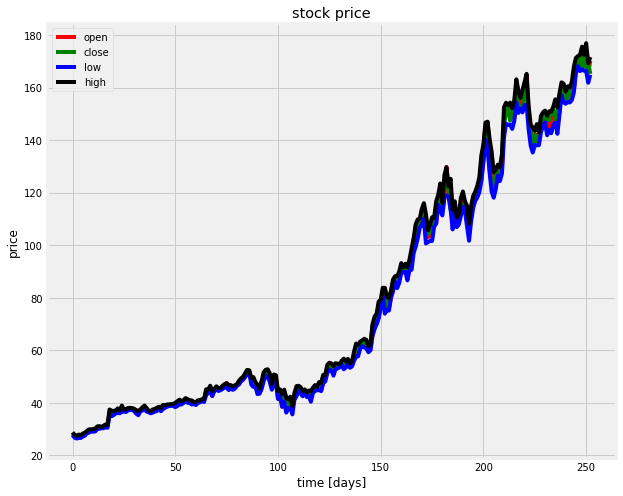

In [10]:
plt.figure(figsize=(20, 8));
plt.subplot(1,2,1);
plt.plot(sea_stock_data.Open.values, color='red', label='open')
plt.plot(sea_stock_data.Close.values, color='green', label='close')
plt.plot(sea_stock_data.Low.values, color='blue', label='low')
plt.plot(sea_stock_data.High.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')

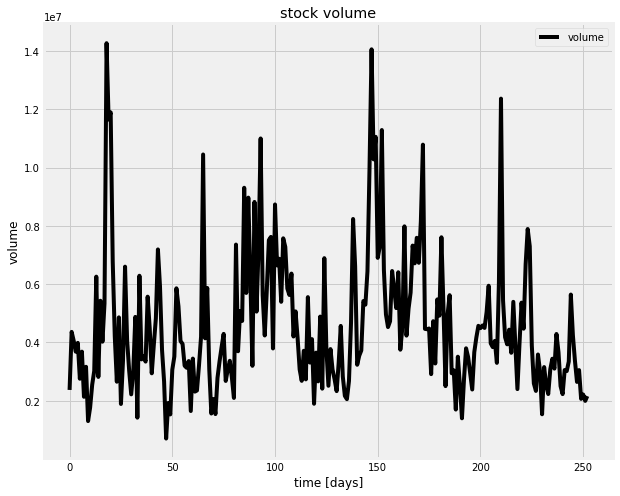

In [11]:
plt.figure(figsize=(20, 8));
plt.subplot(1,2,2);
plt.plot(sea_stock_data.Volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

In [12]:
sea_stock_data = sea_stock_data[['Open']]
print(sea_stock_data.head())

                 Open
Date                 
2019-10-17  28.520000
2019-10-18  27.559999
2019-10-21  26.980000
2019-10-22  27.230000
2019-10-23  26.770000


In [13]:
tencent_stock_data = tencent_stock_data[['Open']]
print(tencent_stock_data.head())

                 Open
Date                 
2019-10-17  42.119999
2019-10-18  42.080002
2019-10-21  41.410000
2019-10-22  41.680000
2019-10-23  40.529999


In [14]:
alibaba_stock_data = alibaba_stock_data[['Open']]
print(alibaba_stock_data.head())

                  Open
Date                  
2019-10-17  178.000000
2019-10-18  176.000000
2019-10-21  172.639999
2019-10-22  174.529999
2019-10-23  170.449997


In [45]:
sp_stock_data = sp_stock_data[['Open']]
print(sp_stock_data.head())

                   Open
Date                   
2020-10-12  3500.020020
2020-10-13  3534.010010
2020-10-14  3515.469971
2020-10-15  3453.719971
2020-10-16  3493.500000


In [16]:
sea_stock_data.info()
alibaba_stock_data.info()
tencent_stock_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-10-17 to 2020-10-16
Data columns (total 1 columns):
Open    253 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-10-17 to 2020-10-16
Data columns (total 1 columns):
Open    253 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-10-17 to 2020-10-16
Data columns (total 1 columns):
Open    253 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB


NameError: name 'ax' is not defined

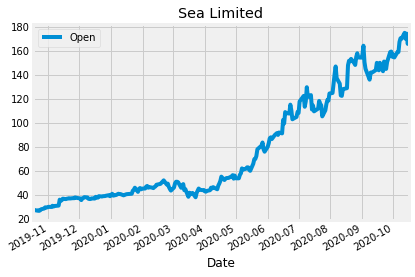

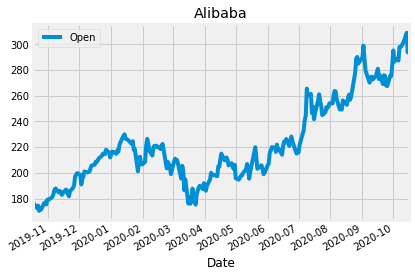

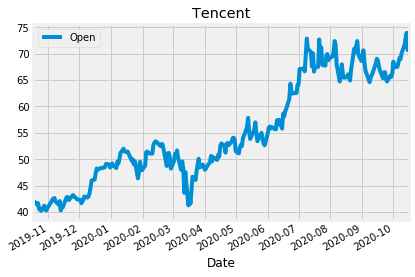

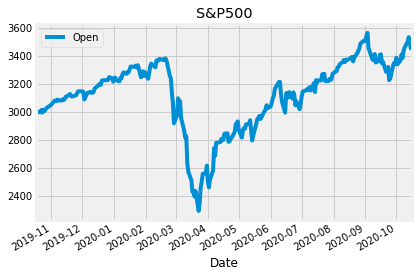

In [44]:
# Stock price from 17 Oct 2019 to 16 Oct 2020
sea_stock_data.plot(title="Sea Limited")
alibaba_stock_data.plot(title="Alibaba")
tencent_stock_data.plot(title="Tencent")
sp_stock_data.plot(title="S&P500")

In [23]:
sea_stock_data.describe()

,Open
count,253.000000
mean,78.025712
std,45.458695
min,26.770000
25%,40.759998
50%,53.540001
75%,117.849998
max,175.000000


In [24]:
alibaba_stock_data.describe()

,Open
count,253.000000
mean,223.067636
std,34.187256
min,170.449997
25%,199.000000
50%,215.009995
75%,250.339996
max,309.000000


In [25]:
tencent_stock_data.describe()

,Open
count,253.000000
mean,55.230395
std,9.918008
min,40.209999
25%,48.310001
50%,52.660000
75%,65.860001
max,73.970001


In [26]:
sp_stock_data.describe()

,Open
count,253.000000
mean,3121.923871
std,254.990488
min,2290.709961
25%,3004.080078
50%,3147.179932
75%,3317.370117
max,3564.739990


In [28]:
sea_stock_return = sea_stock_data.pct_change()
print(sea_stock_return.head())

                Open
Date                
2019-10-17       NaN
2019-10-18 -0.033661
2019-10-21 -0.021045
2019-10-22  0.009266
2019-10-23 -0.016893


In [29]:
alibaba_stock_return = alibaba_stock_data.pct_change()
print(alibaba_stock_return.head())


                Open
Date                
2019-10-17       NaN
2019-10-18 -0.011236
2019-10-21 -0.019091
2019-10-22  0.010948
2019-10-23 -0.023377


In [30]:
tencent_stock_return = tencent_stock_data.pct_change()
print(tencent_stock_return.head())

                Open
Date                
2019-10-17       NaN
2019-10-18 -0.000950
2019-10-21 -0.015922
2019-10-22  0.006520
2019-10-23 -0.027591


In [31]:
sp_stock_return = sp_stock_data.pct_change()
print(sp_stock_return.head())

                Open
Date                
2019-10-17       NaN
2019-10-18 -0.001310
2019-10-21 -0.000120
2019-10-22  0.004756
2019-10-23 -0.005553


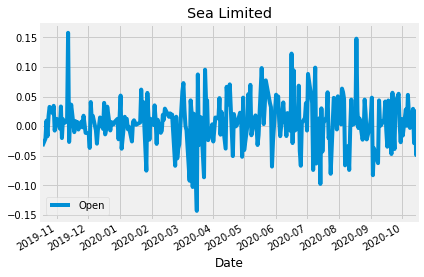

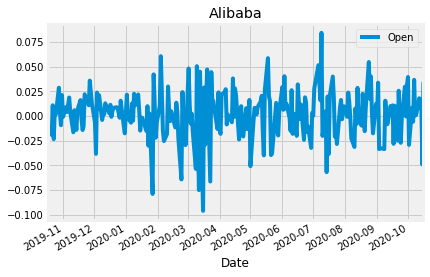

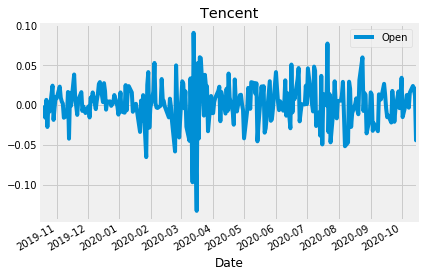

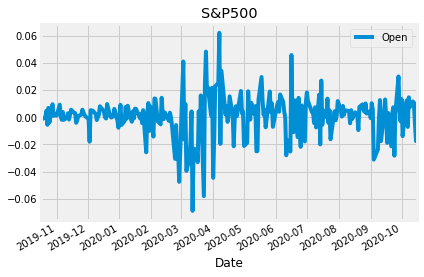

In [32]:
# Movement of excess return of stock per day 
sea_stock_return.plot(title="Sea Limited")
alibaba_stock_return.plot(title="Alibaba")
tencent_stock_return.plot(title="Tencent")
sp_stock_return.plot(title="S&P500")

In [37]:
# Calculating excess return based off the S&P500
excess_return_sea = sea_stock_return.sub(sp_stock_return,axis=0)
excess_return_alibaba = alibaba_stock_return.sub(sp_stock_return,axis=0)
excess_return_tencent = tencent_stock_return.sub(sp_stock_return,axis=0)


print(excess_return_sea.head())

            Open
Date            
2019-10-17   NaN
2019-10-18   0.0
2019-10-21   0.0
2019-10-22   0.0
2019-10-23   0.0


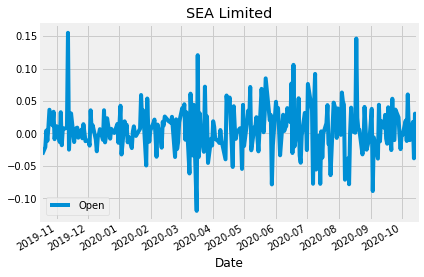

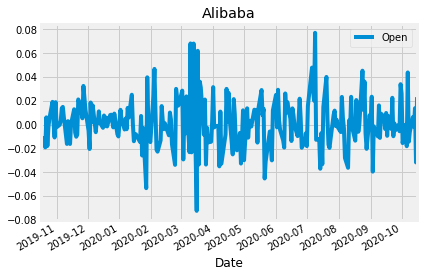

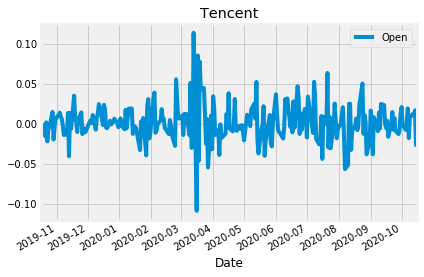

In [38]:
# Movement of excess return pegged against S&P500 
excess_return_sea.plot(title="SEA Limited")
excess_return_alibaba.plot(title="Alibaba")
excess_return_tencent.plot(title="Tencent")

In [191]:
# Average daily excess return for SEA Limited = 0.7209% 
avg_excess_return_sea = excess_return_sea.mean()
avg_excess_return_sea

Open    0.007209
dtype: float64

In [192]:
# Average daily excess return for Alibaba = 0.0170% 
avg_excess_return_alibaba = excess_return_alibaba.mean()
avg_excess_return_alibaba

Open    0.001704
dtype: float64

In [193]:
# Average daily excess return for Tencent = 0.0178% 
avg_excess_return_tencent = excess_return_tencent.mean()
avg_excess_return_tencent

Open    0.001772
dtype: float64

In [194]:
# Standard deviation of excess return for SEA Limited = 3.56%
sd_excess_return_sea = excess_return_sea.std()
sd_excess_return_sea

Open    0.035835
dtype: float64

In [195]:
# Standard deviation of excess return for Alibaba = 2.03%%
sd_excess_return_alibaba = excess_return_alibaba.std()
sd_excess_return_alibaba

Open    0.020262
dtype: float64

In [196]:
# Standard deviation of excess return for Tencent = 2.37%
sd_excess_return_tencent = excess_return_tencent.std()
sd_excess_return_tencent

Open    0.023749
dtype: float64

In [197]:
# Sharpe ratio of SEA Limited
daily_sharpe_ratio_sea = avg_excess_return_sea.div(sd_excess_return_sea)
annual_factor = np.sqrt(253)
annual_sharpe_ratio_sea = daily_sharpe_ratio_sea.mul(annual_factor)
annual_sharpe_ratio_sea

Open    3.200085
dtype: float64

In [198]:
# Sharpe ratio of Alibaba 
daily_sharpe_ratio_alibaba = avg_excess_return_alibaba.div(sd_excess_return_sea)
annual_sharpe_ratio_alibaba = daily_sharpe_ratio_alibaba.mul(annual_factor)
annual_sharpe_ratio_alibaba

Open    0.756274
dtype: float64

In [199]:
# Sharpe ratio of Tencent
daily_sharpe_ratio_tencent = avg_excess_return_tencent.div(sd_excess_return_sea)
annual_sharpe_ratio_tencent = daily_sharpe_ratio_tencent.mul(annual_factor)
annual_sharpe_ratio_tencent

Open    0.786395
dtype: float64